Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# Name: Ciro Salcedo

## Collaborators: Yelissa Lopez, Victor Zhou, Ceasar Stringfield

# HW 5:  Numerical Differentiation and Quadrature

## Question 1 - Fundamental Theorem of Calculus

**(a)** [10] Write a function that computes the integral of the derivative 

$$I[f] = \int^x_0 f'(s) ds$$

and returns the error from the expected calculation.  Use a second order accurate centered difference scheme and then a left-hand rule to compute the absolute error.  In this case the left-hand quadrature is

$$Q[f] = f(x_i) \Delta x$$

The function should take in $x$ values and the function $f(x)$ and return a vector of the **errors** for each value $x$ given.

In [50]:
def int_diff_error(x, f):
    # YOUR CODE HERE
    error = numpy.empty(x.shape)
    N = 100
    
    for j, y in enumerate(x):
        if j == 0:
            error[j] = 0 
        else:
            x_hat = numpy.linspace(0, y, N) #creating points between 0 and the current point
            delta_x = x_hat[1] - x_hat[0] 

            f_prime_hat = numpy.empty(x_hat.shape)
            #special cases for end points
            f_prime_hat[1:-1] = (f(x_hat[2:]) - f(x_hat[:-2])) / (2 * delta_x) 
            f_prime_hat[0] = (f(x_hat[1]) - f(x_hat[0])) / delta_x 
            f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x

            I_hat = f_prime_hat[0] * delta_x 

            for i in range(1, N):
                I_hat += f_prime_hat[i]  * delta_x 

            error[j] = numpy.abs(I_hat - ( f(y) - f(0) ))  
    return error

In [39]:
f = lambda x: 1.0 / (1.0 + 100.0 * x**2)
x = numpy.linspace(0.0, 1.0, 500)
print(numpy.max(int_diff_error(x, f)))
numpy.testing.assert_allclose(int_diff_error(x, f), numpy.zeros(500), atol=1e-2)
print("Successful FTC evaluation.")

0.00515051510250486
Successful FTC evaluation.


**(b)** [10] Compute the same as above except reverse the order of the operations, i.e.

$$D[f] = \frac{\text{d}}{\text{d}x} \int^x_0 f(s) ds$$


In [53]:
def diff_int_error(x, f):
    # YOUR CODE HERE
    error = numpy.empty(x.shape)
    N = 100
    
    for j,y in enumerate(x):
        if j == 0:
            error[j] = 0
        else:
            x_hat = numpy.linspace(0,y,N)
            delta_x = x_hat[1] - x_hat[0]
            
            I_hat = numpy.zeros(x_hat.shape)
            I_hat[0] = f(x_hat[0]) *delta_x
            for i in range(1,N):
                I_hat[i] = I_hat[i - 1] + f(x_hat[i]) * delta_x 
    
            I_prime_hat = (I_hat[-1] - I_hat[-2]) / delta_x 

            error[j] = numpy.abs(I_prime_hat - f(y))
                
    return error

In [54]:
f = lambda x: 1.0 / (1.0 + 100.0 * x**2)
x = numpy.linspace(0.0, 1.0, 500)
print(numpy.max(diff_int_error(x, f)))
numpy.testing.assert_allclose(diff_int_error(x, f), numpy.zeros(500), atol=1e-2)
print("Successful FTC evaluation.")

9.769962616701378e-15
Successful FTC evaluation.


**(c)** [5] Plot the convergence rate for the number of partitions `N = [10,100,200,300,400,500]` on a `loglog` plot by computing the norm over the error given for each $N$ by using the `numpy.linalg.norm` command with `ord=numpy.infty` vs. the $\Delta x$ used.  Theorize about what you observe regarding the order of convergence.

YOUR ANSWER HERE

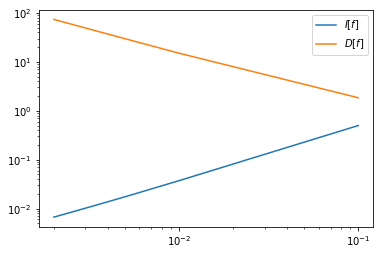

In [55]:
# YOUR CODE HERE
num_partitions = [10,100,200,300,400,500]
delta_x = numpy.empty(len(num_partitions))
error_I = numpy.empty(len(num_partitions))
error_D = numpy.empty(len(num_partitions))

for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N + 1)
    delta_x[j] = x_hat[1] - x_hat[0]
    
    f_prime_I = numpy.empty(x_hat.shape)
    f_prime_I[1:-1] = (f(x_hat[2:]) - f(x_hat[:-2])) / (2 * delta_x[j])
    f_prime_I[0] = (f(x_hat[1]) - f(x_hat[0])) / delta_x[j]
    f_prime_I[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x[j]

    I = numpy.zeros(x_hat.shape)
    I[0] = f_prime_I[0] * delta_x[j]
    for i in range(1, N + 1):
        I[i] = I[i - 1] + f_prime_I[i]  * delta_x[j]
    error_I[j] = numpy.linalg.norm(numpy.abs( I - (f(x_hat) - f(0.0)) ),  ord=numpy.infty)
    
    I_D = numpy.zeros(x_hat.shape)
    I_D[0] = f(x_hat[0]) * delta_x[j]
    for i in range(1, N + 1):
        I_D[i] = I_D[i - 1] + f(x_hat[i]) * delta_x[j]
    
    I_prime_D = numpy.empty(x_hat.shape)
    I_prime_D[1:-1] = I_D[2:] -I_D[:-2] / (2 * delta_x[j])
    I_prime_D[0] = I_D[1] - I_D[0] / delta_x[j]
    I_prime_D[-1] = I_D[-1] - I_D[-2] / delta_x[j]

    error_D[j] = numpy.linalg.norm(numpy.abs(I_prime_D - f(x_hat)),  ord=numpy.infty)    
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_x, error_I, label="$I[f]$")
axes.loglog(delta_x, error_D, label="$D[f]$")
axes.legend()


plt.show()
    
    

## Question 2 - Quadrature

Consider the scaled Fresnel integrals

$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx~~~~\text{and}~~~~I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx$$

which have values

$$I_c = \sqrt{2 \pi} \cdot C\left(\sqrt{\frac{2}{\pi}}\right) \approx 1.8090484758005438$$

$$I_s = \sqrt{2 \pi} \cdot S\left(\sqrt{\frac{2}{\pi}}\right) \approx 0.62053660344676231$$

where the functions $C(x)$ and $S(x)$ can be evaluated by `scipy.special.fresnel`.

**(a)** [2] Where do you imagine the problematic points of the integrals will be?

I anticipate that the function will be difficult to calculate as x approaches zero as the function goes to infinity

**(b)** [10] Write a function that computes both integrals using the  trapezoidal rule with N partitions of equal length "ignoring" the singularity at $x=0$ by setting integrands to 0.

In [4]:
def s(x):
    if x==0:
        return 0
    return numpy.sin(x)/numpy.sqrt(x)
def c(x):
    if x==0:
        return 0
    return numpy.cos(x)/numpy.sqrt(x)

def trap_1(N):
    Is, Ic = 0,0
    x = numpy.linspace(0,1,N+1)
    for i in range(len(x)-1): #exclude the last point, and the first point
        x1 = x[i]
        x2 = x[i+1]
        Is += (x2-x1)/2 *(s(x2)+s(x1))
        Ic += (x2-x1)/2 *(c(x2)+c(x1))
    return Is, Ic

In [5]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_1(200)
error = numpy.abs(Is_hat - Is)
print("Error: %s" % error)
numpy.testing.assert_allclose(error, 0.0, atol=1e-4)
print("Computed the integrals correctly using the trapezoidal rule only.")

Error: 7.324979502942863e-05
Computed the integrals correctly using the trapezoidal rule only.


**(c)** [10] A weighted Newton-Cotes quadrature rule is a modification of our version of Newton-Cotes quadrature except that we also multiply by a weighting function.  This can be useful in situations such as the one we have found ourselves in.  Consider the integral
$$
    \int^{x_{i+1}}_{x_i} \frac{f(x)}{\sqrt{x}} dx
$$
where here the weighting function is $x^{-1/2}$.  Say we wanted to approximate this integral by approximating $f(x)$ as a linear polynomial interpolant.  Find the resulting quadrature rule for approximating the weighted integral.

$$I_N[f] = \int^{x_{i+1}}_{x_i} \frac{(p_0 + p_1 (x - x_i))}{\sqrt x} dx = 2\sqrt{x}(p_0-p_ix_i)+\frac{2}{3}p_ix^{3/2}|^{x_{i+1}}_{x_i}$$


**(d)** Use part (c) and evaluate only the first partition $[0, \Delta x]$ using that quadrature and use trapezoid rule for the rest of the partitions.

In [6]:
def trap_wnc(N):
    x = numpy.linspace(0, 1, N+1)
    delta_x = x[1] - x[0]
    Is = 0.0
    Ic = 0.0
    for i in range(1, N):
        Is += s(x[i]) * delta_x
        Ic += c(x[i]) * delta_x
    Is += s(x[-1]) * delta_x / 2.0  
    Ic += c(x[-1]) * delta_x / 2.0
    #Ic += 2 / 3 * numpy.sqrt(x[1]) * (2 + numpy.cos(x[1]))
    #Is += 2 / 3 * numpy.sqrt(x[1]) * (numpy.sin(x[1]))
    return Is, Ic

In [7]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_wnc(200)
error = numpy.abs(Is_hat - Is)
print("Error: %s" % error)
numpy.testing.assert_allclose(error, 0.0, atol=1e-4)
print("Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.")

Error: 7.324979502942863e-05
Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.


**(e)** [5] Do a change of variables $x = t^2$ and evaluate each integral using the trapezoidal rule for the entire domain.

In [8]:
def trap_transformed(N):    
    t = numpy.linspace(0.0, 1.0, 100)
    t_hat = numpy.linspace(0.0, 1.0, N + 1)
    delta_t = t_hat[1] - t_hat[0]
    
    #transformed functions
    c = lambda t: 2*numpy.cos(t**2) 
    s = lambda t: 2*numpy.sin(t**2)
    
    Ic = c(t_hat[1]) * delta_t / 2.0 
    Is = s(t_hat[1]) * delta_t / 2.0 
    for i in range(1, N):
        Ic += (c(t_hat[i + 1]) + c(t_hat[i])) * delta_t / 2.0 
        Is += (s(t_hat[i + 1]) + s(t_hat[i])) * delta_t / 2.0  
    return Is, Ic

In [9]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_transformed(200)
error = numpy.abs(Is_hat - Is)
print("Error: %s" % error)
numpy.testing.assert_allclose(error, 0.0, atol=1e-5)
print("Computed the integrals correctly using the trapezoidal rule.")

Error: 4.502544250550855e-06
Computed the integrals correctly using the trapezoidal rule.


**(f)** [5] Do the same as in part (e) again using the transformation $x=t^2$ but use 3-point Gauss-Legendre quadrature for the approximation to the integral.

In [19]:
def gauss_legendre_3(N):
    # YOUR CODE HERE
    
    # Initialization 
    x = numpy.linspace(0, 1, 100)
    x_hat = numpy.linspace(0, 1, N + 1)
    delta_x = x_hat[1] - x_hat[0]
    c = lambda x: 2*numpy.cos(x**2)
    s = lambda x: 2*numpy.sin(x**2)
    
    # Compute integral (3-point Gauss-Legendre)
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi = [-numpy.sqrt(3.0 / 5.0), 0.0, numpy.sqrt(3.0 / 5.0)]
    w = [5.0 / 9.0, 8.0 / 9.0, 5.0 / 9.0]
    
    Ic = 0
    Is = 0
    for i in range(0, N):
        for k in range(len(xi)):
            Ic += c(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k]
            Is += s(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k]
    Is *= delta_x / 2.0
    Ic *= delta_x / 2.0

    return Is, Ic

In [21]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = gauss_legendre_3(10)
error = numpy.abs(Is_hat - Is)
print("Error: %s" % error)
numpy.testing.assert_allclose(error, 0.0, atol=1e-10)
print("Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.")

Error: 8.57062198988956e-11
Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.


**(g)** [5] Check the order of accuracy for each of the methods above and plot these on a `loglog` plot with appropriate reference lines to indicate the order of each.

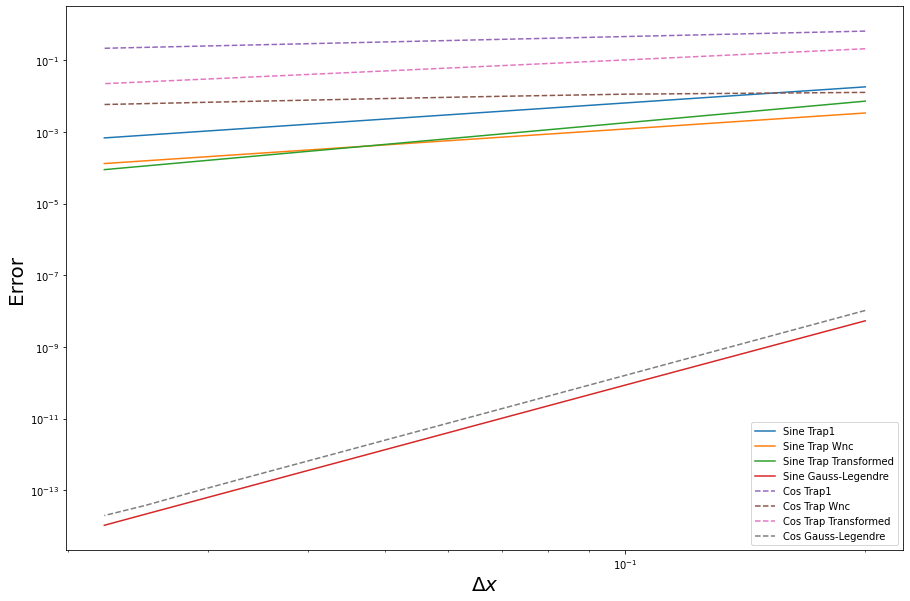

In [22]:
# YOUR CODE HERE
import scipy.special

#fresnel equations
Is_true, Ic_true = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is_true *= numpy.sqrt(2.0 * numpy.pi)
Ic_true *= numpy.sqrt(2.0 * numpy.pi)

x = numpy.linspace(0, 1.0, 100)

#lambda functions
s0 = lambda x: numpy.sin(x) 
c0 = lambda x: numpy.cos(x) 
s = lambda x: numpy.sin(x) / numpy.sqrt(x)
c = lambda x: numpy.cos(x) / numpy.sqrt(x)
cah = lambda x: 2*numpy.cos(x**2)
soh= lambda x: 2*numpy.sin(x**2)

num_partitions = range(5, 50, 5)
delta_x = numpy.empty(len(num_partitions))
serror_trap1 = numpy.empty(len(num_partitions))
serror_wnc = numpy.empty(len(num_partitions))
serror_transformed = numpy.empty(len(num_partitions))
serror_Gauss = numpy.empty(len(num_partitions))
cerror_trap1 = numpy.empty(len(num_partitions))
cerror_wnc = numpy.empty(len(num_partitions))
cerror_transformed = numpy.empty(len(num_partitions))
cerror_Gauss = numpy.empty(len(num_partitions))

for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N + 1)
    sqrt_hat = numpy.sqrt(x_hat)
    delta_x[j] = x_hat[1] - x_hat[0]
    
    # trap_1
    Ic = c(x_hat[1]) * delta_x[j]/2 
    Is = s(x_hat[1]) * delta_x[j]/2 
    for i in range(1, N):
        Ic += (c(x_hat[i + 1]) + c(x_hat[i])) * delta_x[j]/2
        Is += (s(x_hat[i + 1]) + s(x_hat[i])) * delta_x[j]/2
    serror_trap1[j] = numpy.abs(Is_true - Is)
    cerror_trap1[j] = numpy.abs(Ic_true - Ic)

    
    # trap_wnc
    Ic = 2*c0(x_hat[1]) * sqrt_hat[1] - (4/3) * x_hat[1] * sqrt_hat[1] * (( c0(x_hat[1]) - c0(x_hat[0]) ) / delta_x[j])
    Is = 2*s0(x_hat[1]) * sqrt_hat[1] - (4/3) * x_hat[1] * sqrt_hat[1] * (( s0(x_hat[1]) - s0(x_hat[0]) ) / delta_x[j])
    for i in range(1, N):
        Ic += (c(x_hat[i + 1]) + c(x_hat[i])) * delta_x[j]/2
        Is += (s(x_hat[i + 1]) + s(x_hat[i])) * delta_x[j]/2 
    serror_wnc[j] = numpy.abs(Is_true - Is)
    cerror_wnc[j] = numpy.abs(Ic_true - Ic)

    
    # trap_transformed
    Ic = cah(x_hat[1]) * delta_x[j]/2
    Is = soh(x_hat[1]) * delta_x[j]/2 
    for i in range(1, N):
        Ic += (cah(x_hat[i + 1]) + cah(x_hat[i])) * delta_x[j]/2 
        Is += (soh(x_hat[i + 1]) + soh(x_hat[i])) * delta_x[j]/2
    serror_transformed[j] = numpy.abs(Is_true - Is)
    cerror_transformed[j] = numpy.abs(Ic_true - Ic)
    
    # Gauss-Legendre 3-point
    xi_map = lambda a,b,xi :(b-a)/2*xi+(a+b)/2
    xi = [-numpy.sqrt(3/5), 0, numpy.sqrt(3/5)]
    w = [5/9, 8/9, 5/9]
    
    Ic = 0
    Is = 0
    for i in range(0, N):
        for k in range(len(xi)):
            Ic += cah(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k]
            Is += soh(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k]
    Ic *= delta_x[j]/2
    Is *= delta_x[j]/2
    serror_Gauss[j] = numpy.abs(Is_true - Is)
    cerror_Gauss[j] = numpy.abs(Ic_true - Ic)

    
plt.figure(figsize=(15, 10))
plt.xlabel("$\Delta x$",fontsize=20)
plt.ylabel("Error",fontsize=20)

plt.loglog(delta_x, serror_trap1, label="Sine Trap1")
plt.loglog(delta_x, serror_wnc, label="Sine Trap Wnc")
plt.loglog(delta_x, serror_transformed, label="Sine Trap Transformed")
plt.loglog(delta_x, serror_Gauss, label="Sine Gauss-Legendre")

plt.loglog(delta_x, cerror_trap1, label="Cos Trap1",linestyle="--")
plt.loglog(delta_x, cerror_wnc, label="Cos Trap Wnc",linestyle="--")
plt.loglog(delta_x, cerror_transformed, label="Cos Trap Transformed",linestyle="--")
plt.loglog(delta_x, cerror_Gauss, label="Cos Gauss-Legendre",linestyle="--")

plt.legend(fontsize=10)

**(h)** [3] Comment on the results of this question and the vast differences in convergence rates even between the two integrations (why is $I_c$ less accurate than $I_s$).

The error on $I_c$ is greater than $I_s$ as $I_c$ has a term that goes infinity as it integrates around zero. Otherwise it is clear that the Gauss-Legendre method is most accurate.

## Question 3

We can often reformulate finite difference approximations as matrix-vector products.  For the following assume that the data considered are equi-spaced points $(x_i, y_i)$, i.e. $\Delta x$ is uniform.

**(a)** [10] Derive the forward and backward second order finite difference approximations to the second derivative using the method of your choice.


Forward:

$$
f'(x) \approx P'_2(x) = [y_0, y_1] + ((x - x_1) + (x - x_0)) [y_0, y_1, y_2] \\
= \frac{y_1-y_0}{x_1-x_0} + ((x-x_1)+(x-x_0)) \left (\frac{y_2 - y_1}{(x_2 - x_1)(x_2 - x_0)} - \frac{y_1 - y_0}{(x_1 - x_0)(x_2 - x_0)} \right) \\
= \frac{f(x_1)-f(x_0)}{x_1 - x_0} + (2x-x_1-x_0) \left (\frac{f(x_2) - f(x_1)}{(x_2 - x_1)2(x_2 - x_0)} - \frac{f(x_1)-f(x_0)}{(x_1-x_0)2(x_2 - x_0)} \right) 
$$

$$
f'' = (2) \left (\frac{f(x_2) - f(x_1)}{(x_2 - x_1)2(x_2 - x_0)} - \frac{f(x_1)-f(x_0)}{(x_1-x_0)2(x_2 - x_0)} \right) 
\\
= \left (\frac{f(x_2) - f(x_1)}{(x_2 - x_1)(x_2 - x_0)} - \frac{f(x_1)-f(x_0)}{(x_1-x_0)(x_2 - x_0)} \right) 
\\
= \left (\frac{f(x_2) - 2f(x_1) + f(x_0)}{(\Delta x)^2} \right) 
$$

Forward:
$$
 \left (\frac{f(x_{n+2}) - 2f(x_{n+1}) + f(x_{n})}{(\Delta x)^2} \right) 
$$

Centered:
$$
 \left (\frac{f(x_{n+1}) - 2f(x_{n}) + f(x_{n-1})}{(\Delta x)^2} \right) 
$$

Backward:
$$
 \left (\frac{f(x_{n}) - 2f(x_{n-1}) + f(x_{n-2})}{(\Delta x)^2} \right) 
$$

**(b)** [10] Using a second order centered finite difference approximation to the second derivative and the appropriate second order forward and backward difference schemes at the edges of the domain find the matrix $D$ such that multiplying a vector of $y$ values would lead to a second order approximation of the derivative for the given data.  In other words for $y_i = f(x_i)$
$$
    f''(x) \approx D y.
$$

D is a tridiagonal matrix that where each row will give the coefficients need to calculate the finite difference approximation. At the first and last point the forward and backward difference must be used respectively as using the centered difference would be out of bounds of the array. However, the centered difference can be used for all other points as they have a point before and after them.
$$
D = \dfrac{1}{\Delta^2 x}
\begin{bmatrix}
    1 & -2 & 1 & 0 & \cdots & 0 & 0\\
    1 & -2 & 1 & 0 & \cdots & 0 & 0\\
    0 & 1 & -2 & 1 & 0 & \cdots & 0\\
    \cdots & \cdots & \cdots & \cdots & \cdots & \cdots \\
    0 & 0 & \cdots & 1 & -2 & 1 & 0\\
    0 & 0 & \cdots & 0 & 1 & -2 & 1\\
    0 & 0 & \cdots & 0 & 1 & -2 & 1
\end{bmatrix}
$$

**(c)** [10] Write a function that takes in the number of data points $N$ and returns the matrix $D$.  Here assume we are on the interval $[-1, 1]$.  Note that inside your function 
$$
    \Delta x = \frac{2}{N - 1}
$$
to match the `linspace` command.

Beyond being convenient (once you construct the matrix you can apply it to any set of data) this operation is much faster than using loops.  *Hint:* The command `numpy.diag` may be extremely helpful.

In [40]:
def diff_matrix(N):
    # YOUR CODE HERE
    weight = ((N-1)/2)**2
    D = numpy.zeros([N,N])
    
    D[0][0] = 1
    D[0][1] = -2
    D[0][2] = 1
    
    D[-1][-1] = 1
    D[-1][-2] = -2
    D[-1][-3] = 1
    
    for i in range(1,N-1):
        D[i][i-1] = 1
        D[i][i] = -2
        D[i][i+1] = 1
    return weight*D

In [41]:
N = 200
x = numpy.linspace(-1, 1, N)
y = numpy.sin(x) * numpy.cos(x)
numpy.testing.assert_allclose(numpy.dot(diff_matrix(N), y), -4.0 * numpy.sin(x) * numpy.cos(x), rtol=1e-2)
print("Success!")

Success!


**(c)** [5] Suppose instead that we did not know the vector $f(x_i) = y_i$ but instead knew the value of second derivative at these points.  If we wanted to find the vector $y$ what kind of problem would we have to solve?  What is the continuous analog of this problem and what additional information would we need?

The problem would need to be solved in reverse and D would need to be invertible such that we could have $D^{-1} f''(x) = y$. This would be a second order ODE which would require both the Neumann and Dirichlet bounds to solve.